# 3. Numerical Values and DateTime Values

In [1]:
%store -r df
%store -r date_df

In [2]:
df.head(2)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [3]:
date_df.head(2)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00


This confirms all cells are prior work have been read properly. 

Since this notebook attempts to display numeric values changes, I'm going to tackle the following items from step 1:

- Create a total revenue column (Quanity * Price). 
- Investigate if the price is associated with the country's currency. 

In [4]:
date_df['revenue'] = date_df.quantity * date_df.price

In [5]:
# Let's initialize a new variable 
revenue_df = date_df

In [6]:
revenue_df.head(2)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,81.0


In [7]:
# Storing the cost_df variable
%store revenue_df

Stored 'revenue_df' (DataFrame)


In [8]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 12 columns):
invoice          1067371 non-null object
stockcode        1067371 non-null object
description      1062989 non-null object
quantity         1067371 non-null int64
invoicedate      1067371 non-null object
price            1067371 non-null float64
customer_id      824364 non-null float64
country          1067371 non-null object
date_and_time    1067371 non-null datetime64[ns]
date             1067371 non-null datetime64[ns]
time             1067371 non-null object
revenue          1067371 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 97.7+ MB


Now let's look at the numerical features, which are currently just Quantity, Price, Customer ID, and Cost. 

In [9]:
# We had some negatives in our initial finding
revenue_df.price.min()

-53594.36

In [10]:
revenue_df.quantity.min()

-80995

Here is the debate between keeping data in or keeping data out. And in order for this particular exercise to move forward, I am all in favor of removing any 

In [11]:
neg_prices = revenue_df[revenue_df.price <= 0]
neg_prices.head(2)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time,revenue
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom,2009-12-01 10:52:00,2009-12-01,10:52:00,-0.0
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom,2009-12-01 10:52:00,2009-12-01,10:52:00,-0.0


In [12]:
neg_prices.shape

(6207, 12)

This means we have 6207 rows with 0 or less in the price column. Now let's look at quanitty.

In [14]:
neg_quants = revenue_df[revenue_df.quantity <= 0]
neg_quants.head(2)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time,revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009-12-01 10:33:00,2009-12-01,10:33:00,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009-12-01 10:33:00,2009-12-01,10:33:00,-9.9


In [16]:
neg_quants.shape

(22950, 12)

### Removing rows with quantity and price equal to or less than zero.

In [39]:
revenue_df_test1 = revenue_df[~revenue_df.quantity <= 0]

In [49]:
revenue_df_test1.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,30.0


In [52]:
revenue_df_test3 = revenue_df_test1[revenue_df_test1.price > 0]

In [54]:
revenue_df_test3.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00,30.0


In [62]:
revenue_df_test3.dtypes

invoice                  object
stockcode                object
description              object
quantity                  int64
invoicedate              object
price                   float64
customer_id             float64
country                  object
date_and_time    datetime64[ns]
date             datetime64[ns]
time                     object
revenue                 float64
dtype: object

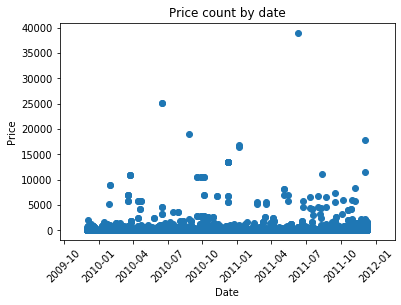

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=revenue_df_test3.date, y=revenue_df_test3.price)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price count by date')
plt.show();

### Rearranging date frame for easy readablility

### Finding the mean revenue

Now let's look at how many other countries there are in this dataset.

In [17]:
import numpy as np

revenue_df.country.value_counts()[:10]

United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Spain               3811
Switzerland         3189
Belgium             3123
Portugal            2620
Australia           1913
Name: country, dtype: int64

Well, this is slightly alarming. We are really talking about a global enterprise here. In addition to the multitude of countries, we have 756 entries that are "Unspecified" as well as 61 in the "European Community" - why would they aggregate these instead of listing them? We should move forward. 

In [18]:
# 756 entries with the `Unspecified` country name.
revenue_df.country.value_counts()[18:19]

Unspecified    756
Name: country, dtype: int64

******************* COME BACK TO THIS ******************* 

1) This of the possible problems this dataset poses if the cost per country differs based on currency. 

******************* COME BACK TO THIS ******************* 


Next up is boolean and categorical values

1. Target Value Identification and Exploration

2. Identify Datetimes for Split

3. Numerical Values and DateTime Values

4. **Boolean and Categorical Values**

5. Coercing Datetimes (add_datepart), and handling na values

6. Train and Score Initial Model 

7. Plot/Coerce Target Variable (optional)